In [1]:
# Import dependencies
from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [3]:
# assign the uk_food database to a variable name
db = mongo['uk_food']

In [4]:
# review the collections in our database
print(db.list_collection_names())

['establishments']


In [5]:
# assign the collection to a variable
establishments = db['establishments']

In [6]:
# 1. Which establishments have a hygiene score equal to 20?

# Find the establishments with a hygiene score of 20
query = {"scores.Hygiene": 20}
fields = {"FHRSID":1, "BusinessName":1, "BusinessType":1, "scores.Hygiene":1}
sort = [('BusinessName', 1)]

# Cast the results as a list and save the results to a variable
results = establishments.find(query, fields).sort(sort)

# Use count_documents to display the number of documents in the result
nums = establishments.count_documents(query)
print(f"There are {nums} businesses with a hygiene rating = 20\n")

# Display the first document in the results using pprint
for result in results:
    pprint(result)
    break

There are 41 businesses with a hygiene rating = 20

{'BusinessName': 'A1 News & Wine',
 'BusinessType': 'Retailers - other',
 'FHRSID': 570096,
 '_id': ObjectId('64e3efc91e5c6c276a5fec2d'),
 'scores': {'Hygiene': 20}}


In [7]:
# Convert the result to a Pandas DataFrame

# Display the number of rows in the DataFrame

# Display the first 10 rows of the DataFrame
results = establishments.find(query, fields).sort(sort)
df = pd.DataFrame(results)
print(df.shape)
df.head(10)

(41, 5)


,_id,FHRSID,BusinessName,BusinessType,scores
0,64e3efc91e5c6c276a5fec2d,570096,A1 News & Wine,Retailers - other,{'Hygiene': 20}
1,64e3efc91e5c6c276a5ff1b5,640363,Angels Bakery,Other catering premises,{'Hygiene': 20}
2,64e3efc61e5c6c276a5f982b,512854,Ashby's Butchers,Retailers - other,{'Hygiene': 20}
3,64e3efc81e5c6c276a5fda9c,710382,Asian Supermarket Ltd: T/A Best Food Wine Ltd,Retailers - other,{'Hygiene': 20}
4,64e3efc91e5c6c276a5fef6c,1130121,Bali Maamalas,Restaurant/Cafe/Canteen,{'Hygiene': 20}
5,64e3efc51e5c6c276a5f8985,612039,Brenalwood,Caring Premises,{'Hygiene': 20}
6,64e3efc91e5c6c276a5fed39,1500698,Cakes & Bakes,Takeaway/sandwich shop,{'Hygiene': 20}
7,64e3efc91e5c6c276a5fe8f7,1210197,Caribiscus Ltd,Restaurant/Cafe/Canteen,{'Hygiene': 20}
8,64e3efc91e5c6c276a5ff270,1530599,Chicago 30,Takeaway/sandwich shop,{'Hygiene': 20}
9,64e3efc81e5c6c276a5fdd67,1060293,Costcutter,Retailers - other,{'Hygiene': 20}


In [8]:
# 2. Which establishments in London have a RatingValue greater than or equal to 4?

# Find the establishments with London as the Local Authority and has a RatingValue greater than or equal to 4.
query = {"LocalAuthorityName":{"$regex": "London"},
        "RatingValue": {"$gte": 4}}

fields = {"FHRSID":1, "BusinessName":1, "BusinessType":1, "LocalAuthorityName":1, "RatingValue":1}
sort = [('RatingValue', -1)]

# Cast the results as a list and save the results to a variable
results = establishments.find(query, fields).sort(sort)

# Use count_documents to display the number of documents in the result
nums = establishments.count_documents(query)
print(f"There are {nums} businesses matching the query\n")

# Display the first document in the results using pprint
for result in results:
    pprint(result)
    break

There are 33 businesses matching the query

{'BusinessName': 'Mv City Cruises Erasmus',
 'BusinessType': 'Other catering premises',
 'FHRSID': 1130836,
 'LocalAuthorityName': 'City of London Corporation',
 'RatingValue': 5,
 '_id': ObjectId('64e3efc61e5c6c276a5fa345')}


In [9]:
# Convert the result to a Pandas DataFrame

# Display the number of rows in the DataFrame

# Display the first 10 rows of the DataFrame
results = establishments.find(query, fields).sort(sort)
df = pd.DataFrame(results)
print(df.shape)
df.head(10)

(33, 6)


,_id,FHRSID,BusinessName,BusinessType,RatingValue,LocalAuthorityName
0,64e3efc61e5c6c276a5fa345,1130836,Mv City Cruises Erasmus,Other catering premises,5,City of London Corporation
1,64e3efc71e5c6c276a5fbc92,1315095,Coombs Catering t/a The Lock and Key,Restaurant/Cafe/Canteen,5,City of London Corporation
2,64e3efc71e5c6c276a5fbc93,294474,Tilbury Seafarers Centre,Restaurant/Cafe/Canteen,5,City of London Corporation
3,64e3efc81e5c6c276a5fc39b,294900,Mv Valulla,Other catering premises,5,City of London Corporation
4,64e3efc91e5c6c276a5fe4a9,293756,Tereza Joanne,Other catering premises,5,City of London Corporation
5,64e3efc91e5c6c276a5fe88a,293772,The Nuance Group (UK) Limited,Retailers - other,5,City of London Corporation
6,64e3efc91e5c6c276a5fe88b,294606,WH Smith,Retailers - other,5,City of London Corporation
7,64e3efc91e5c6c276a5fe88c,295107,City Bar & Grill,Restaurant/Cafe/Canteen,5,City of London Corporation
8,64e3efc91e5c6c276a5fea6a,294523,Jet Centre,Restaurant/Cafe/Canteen,5,City of London Corporation
9,64e3efc91e5c6c276a5fea6b,294616,Caffè Nero,Restaurant/Cafe/Canteen,5,City of London Corporation


In [10]:
# 3. What are the top 5 establishments with a `RatingValue` rating value of 5, sorted by lowest hygiene score, nearest to the new restaurant added, "Penang Flavours"?

# Search within 0.01 degree on either side of the latitude and longitude.
# Rating value must equal 5
# Sort by hygiene score

degree_search = 0.01
latitude = 51.49014200
longitude = 0.08384000

query = {'geocode.latitude': {'$gte':latitude-degree_search, '$lte':latitude+degree_search},
         'geocode.longitude': {'$gte': longitude-degree_search, '$lte': longitude+degree_search},
         'RatingValue': 5}
sort = [('score.Hygiene', 1)]
fields = {"FHRSID":1, "BusinessName":1, "BusinessType":1, "geocode.latitude": 1, "geocode.longitude": 1, "scores.Hygiene":1, "RatingValue": 1}
limit = 5

# Print the results
results = establishments.find(query, fields).sort(sort).limit(limit)

for result in results:
    pprint(result)

{'BusinessName': 'Volunteer',
 'BusinessType': 'Pub/bar/nightclub',
 'FHRSID': 694609,
 'RatingValue': 5,
 '_id': ObjectId('64e3efc81e5c6c276a5fde63'),
 'geocode': {'latitude': 51.4873437, 'longitude': 0.09208},
 'scores': {'Hygiene': 0}}
{'BusinessName': 'Plumstead Manor Nursery',
 'BusinessType': 'Caring Premises',
 'FHRSID': 695241,
 'RatingValue': 5,
 '_id': ObjectId('64e3efc81e5c6c276a5fde7b'),
 'geocode': {'latitude': 51.481517791748, 'longitude': 0.0859939977526665},
 'scores': {'Hygiene': 0}}
{'BusinessName': 'Iceland',
 'BusinessType': 'Retailers - supermarkets/hypermarkets',
 'FHRSID': 695223,
 'RatingValue': 5,
 '_id': ObjectId('64e3efc81e5c6c276a5fde36'),
 'geocode': {'latitude': 51.4871482849121, 'longitude': 0.0924199968576431},
 'scores': {'Hygiene': 0}}
{'BusinessName': 'TIWA N TIWA African Restaurant Ltd',
 'BusinessType': 'Restaurant/Cafe/Canteen',
 'FHRSID': 1069652,
 'RatingValue': 5,
 '_id': ObjectId('64e3efc81e5c6c276a5fde0f'),
 'geocode': {'latitude': 51.4870351,

In [11]:
# Convert result to Pandas DataFrame
results = establishments.find(query, fields).sort(sort).limit(limit)
df = pd.DataFrame(results)
print(df.shape)
df.head(10)

(5, 7)


,_id,FHRSID,BusinessName,BusinessType,RatingValue,scores,geocode
0,64e3efc81e5c6c276a5fde63,694609,Volunteer,Pub/bar/nightclub,5,{'Hygiene': 0},"{'longitude': 0.09208, 'latitude': 51.4873437}"
1,64e3efc81e5c6c276a5fde7b,695241,Plumstead Manor Nursery,Caring Premises,5,{'Hygiene': 0},"{'longitude': 0.0859939977526665, 'latitude': ..."
2,64e3efc81e5c6c276a5fde36,695223,Iceland,Retailers - supermarkets/hypermarkets,5,{'Hygiene': 0},"{'longitude': 0.0924199968576431, 'latitude': ..."
3,64e3efc81e5c6c276a5fde0f,1069652,TIWA N TIWA African Restaurant Ltd,Restaurant/Cafe/Canteen,5,{'Hygiene': 5},"{'longitude': 0.0927429, 'latitude': 51.4870351}"
4,64e3efc81e5c6c276a5fde46,1380578,Howe and Co Fish and Chips - Van 17,Mobile caterer,5,{'Hygiene': 0},"{'longitude': 0.0925370007753372, 'latitude': ..."


In [12]:
# 4. How many establishments in each Local Authority area have a hygiene score of 0?

# Create a pipeline that:
# 1. Matches establishments with a hygiene score of 0
# 2. Groups the matches by Local Authority
# 3. Sorts the matches from highest to lowest

# Print the number of documents in the result

# Print the first 10 results

query = [
    {"$match":
        {"scores.Hygiene": 0}
    },
    {"$group":
        {'_id': "$LocalAuthorityName",
         "num_items": {"$sum": 1}
        }
    },
    {"$sort": {"num_items": -1}}
]

data = list(establishments.aggregate(query))
print(f"There are {len(data)} Local Authorities with at least one Restaurant with a Hygiene of 0")

pprint(data[0:10])

There are 55 Local Authorities with at least one Restaurant with a Hygiene of 0
[{'_id': 'Thanet', 'num_items': 1130},
 {'_id': 'Greenwich', 'num_items': 882},
 {'_id': 'Maidstone', 'num_items': 713},
 {'_id': 'Newham', 'num_items': 711},
 {'_id': 'Swale', 'num_items': 686},
 {'_id': 'Chelmsford', 'num_items': 680},
 {'_id': 'Medway', 'num_items': 672},
 {'_id': 'Bexley', 'num_items': 607},
 {'_id': 'Southend-On-Sea', 'num_items': 586},
 {'_id': 'Tendring', 'num_items': 542}]


In [13]:
# Convert the result to a Pandas DataFrame
df = pd.DataFrame(data)

# Display the number of rows in the DataFrame
print(df.shape)

# Display the first 10 rows of the DataFrame
df.head(10)

(55, 2)


,_id,num_items
0,Thanet,1130
1,Greenwich,882
2,Maidstone,713
3,Newham,711
4,Swale,686
5,Chelmsford,680
6,Medway,672
7,Bexley,607
8,Southend-On-Sea,586
9,Tendring,542


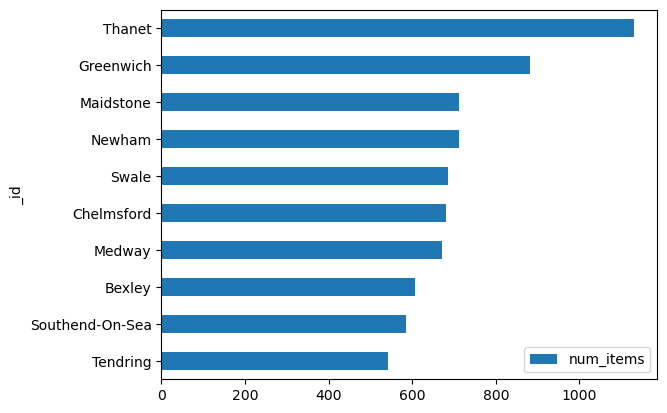

In [14]:
df.sort_values(by="num_items").tail(10).plot(kind="barh", y="num_items", x="_id")
plt.show()